In [9]:
"""
prepared example to show the drawing of the boxes

"""

import cv2
import json
import random
from matplotlib.patches import Rectangle
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../src/')
import functions_boxes


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
../segmentation/DSC_0798 2023-10-05 12_04_19/segment1_lines_boxes.png found. Using _lines_boxes image.
Boxes loaded from ../segmentation/DSC_0798 2023-10-05 12_04_19/segment1_lines_boxes.json
../segmentation/DSC_0798 2023-10-05 12_04_19/segment2_lines_boxes.png found. Using _lines_boxes image.
Boxes loaded from ../segmentation/DSC_0798 2023-10-05 12_04_19/segment2_lines_boxes.json
../segmentation/DSC_0798 2023-10-05 12_04_19/segment3_lines_b

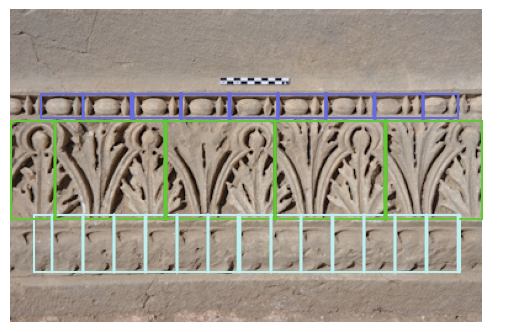

In [10]:


# Load original image
original_image_path = "../dataset/trainset/DSC_0798 2023-10-05 12_04_19.JPG"
original_image = cv2.imread(original_image_path)
original_image_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# List of paths to segmented images
original_image_basename = os.path.splitext(os.path.basename(original_image_path))[0]
segment_folder = f"../segmentation/{original_image_basename}/"
segment_images_paths = [os.path.join(segment_folder, fname) for fname in os.listdir(segment_folder) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Convert the original image to RGB for displaying with matplotlib
image_np = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1)
ax.imshow(image_np)

# Process each segment image
for segment_image_path in segment_images_paths:
    segment_base = os.path.splitext(segment_image_path)[0]  # Get the base name of the segment_image_path
    lines_boxes_image_path = segment_base + "_lines_boxes.png"
    lines_boxes_path = segment_base + "_lines_boxes.json"
    coords_json_path = segment_base + "_coords.json"  
    
    # Check if the segment has a _lines_boxes image
    if not os.path.exists(lines_boxes_path):
        print(f"{lines_boxes_path} not found. Using CNN activations algorithm to create boxes.")
        boxes = functions_boxes.get_boxes(segment_image_path)
        # Save the _lines_boxes to a text file
        functions_boxes.save_boxes_to_json(boxes, lines_boxes_path)
       
    else:
        print(f"{lines_boxes_image_path} found. Using _lines_boxes image.")
        # Load the _lines_boxes 
        boxes = functions_boxes.load_boxes_from_json(lines_boxes_path)
    # Check if the segment has a coordinate JSON file
    if os.path.exists(coords_json_path):
        with open(coords_json_path, "r") as f:
            coords = json.load(f)
            min_x = coords["min_x"]
            max_x = coords["max_x"]
            min_y = coords["min_y"]
            max_y = coords["max_y"]
    else:
        print(f"{coords_json_path} not found. Using template matching to get coordinates.")
        template_image = cv2.imread(segment_image_path)
        template_image_gray = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)
        
        # Perform template matching
        top_left, match_val = functions_boxes.template_match(original_image_gray, template_image_gray)
        print(f"Match value: {match_val}")
        
        # Define bounding box
        h, w = template_image_gray.shape
        min_x, max_x = top_left[0], top_left[0] + w
        min_y, max_y = top_left[1], top_left[1] + h
        coords = {"min_x": min_x, "max_x": max_x, "min_y": min_y, "max_y": max_y}
        # Save coordinates to a JSON file
        with open(coords_json_path, "w") as f:
            json.dump(coords, f)

    # Draw bounding box on the original image
    color = functions_boxes.random_color()
    functions_boxes.draw_bounding_boxes(ax, fig, coords, boxes, color)
    

In [11]:

plt.show()
